In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\ketha\AppData\Local\Temp/ipykernel_3128/3543099408.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


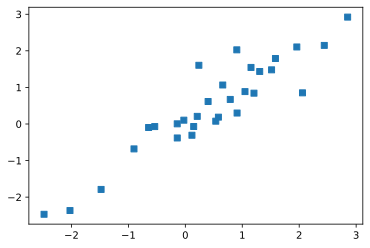

In [9]:
#create data
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [11]:
# build model
ANNreg=nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1))
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
# learning rate
learningRate=.05

#loss function
lossfun=nn.MSELoss()

#optimizer (the flavor of gradient descent to implement)
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [18]:
#train the model

numepochs=500
losses=torch.zeros(numepochs)
for epochi in range(numepochs):
    yHat=ANNreg(x)
    #forward pass
    loss=lossfun( yHat,y)
    losses[epochi]=loss
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

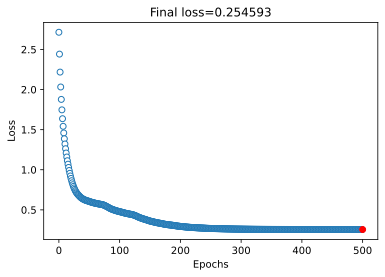

In [23]:
# show the losses
#manually compute the losses
#final forward pass
predictions=ANNreg(x)
#final los (MSE)
testloss=(predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Final loss=%g'%testloss.item())
plt.show()

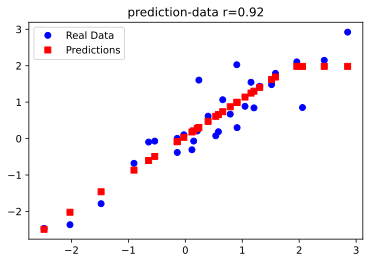

In [27]:
#plot the data
plt.plot(x,y,'bo',label='Real Data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()